Epoch 1/100
46/46 [==============================] - 0s 6ms/step - loss: 164502.0469
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 119637.3281
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 95692.4297
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 89932.1641
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 86671.8984
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 84329.8594
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 81964.3359
Epoch 8/100
46/46 [==============================] - 0s 5ms/step - loss: 79306.8359
Epoch 9/100
46/46 [==============================] - 0s 5ms/step - loss: 76116.6562
Epoch 10/100
46/46 [==============================] - 0s 5ms/step - loss: 71895.9062
Epoch 11/100
46/46 [==============================] - 0s 5ms/step - loss: 65661.1250
Epoch 12/100
46/46 [==============================] - 0s 5ms/step - loss

<Axes: >

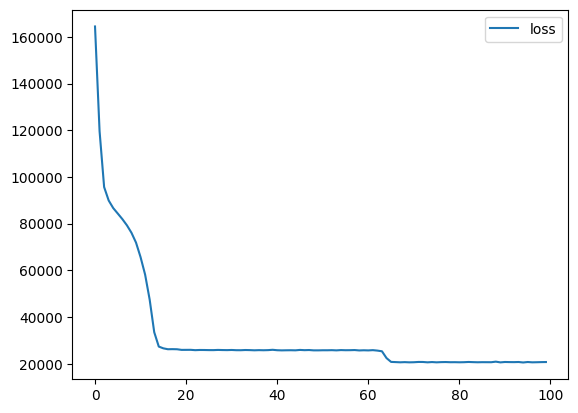

In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf

houses_train = pd.read_csv('train.csv')
houses_test = pd.read_csv('test.csv')
numeric_features_names = ['KitchenAbvGr', 'GarageCars', 'FullBath', 'GarageArea', '1stFlrSF', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'Fireplaces', 'TotRmsAbvGrd', 'YearBuilt', 'BedroomAbvGr', 'HalfBath', 'LotArea', 'MSSubClass', 'YearRemodAdd', 'MoSold', 'BsmtFullBath', 'YrSold']
numeric_features = houses_train[numeric_features_names]
sale_price = houses_train['SalePrice']
X = tf.convert_to_tensor(numeric_features)
Y = tf.convert_to_tensor(houses_train['SalePrice'])
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X)
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1, activation='relu'),
])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30, restore_best_weights=True)
model.compile(
    loss='mean_absolute_error', 
    optimizer=tf.keras.optimizers.legacy.Adam(300),
)
hist = model.fit(X, Y, epochs=100, verbose=1, callbacks=[callback])
history_df = pd.DataFrame(hist.history)
history_df.loc[:, ['loss']].plot()

[<tf.Variable 'dense_48/kernel:0' shape=(20, 1) dtype=float32, numpy=
array([[-4505.833  ],
       [ -190.67624],
       [ -265.49472],
       [ 6039.298  ],
       [  778.36865],
       [32670.812  ],
       [16779.588  ],
       [ 6019.2134 ],
       [ 8504.601  ],
       [ 2579.1165 ],
       [ 1643.5912 ],
       [12970.733  ],
       [-5482.817  ],
       [-1290.7693 ],
       [ 6432.3853 ],
       [-4900.3115 ],
       [ 2403.7776 ],
       [ -268.06732],
       [ 5205.0586 ],
       [ -576.9515 ]], dtype=float32)>, <tf.Variable 'dense_48/bias:0' shape=(1,) dtype=float32, numpy=array([177663.17], dtype=float32)>]
46/46 [==============================] - 0s 2ms/step


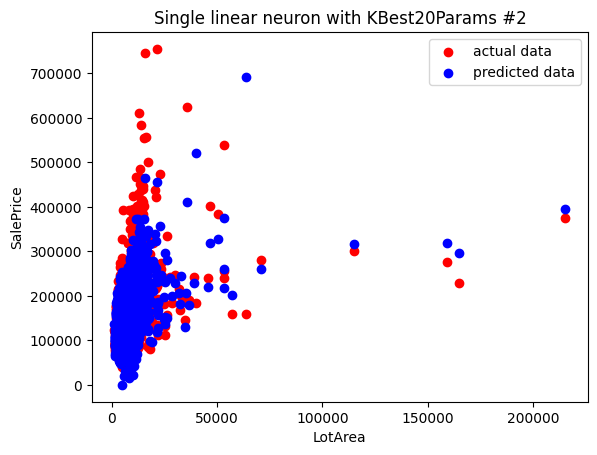

In [42]:

import matplotlib.pyplot as plt
Y_predict = model.predict(X)
plt.scatter(numeric_features.LotArea, sale_price, color='red', label='actual data')
plt.scatter(numeric_features.LotArea, Y_predict, color='blue', label='predicted data')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Single linear neuron with KBest20Params #2')
plt.legend()


In [36]:
X_test = tf.convert_to_tensor(houses_test[numeric_features_names])
Y_test = model.predict(X_test)
arr = np.concatenate((np.array(houses_test['Id']).reshape(-1, 1), Y_test), axis=1)
np.savetxt("submission5.csv", arr, fmt='%d,%1.5f', header='Id,SalePrice', comments='')

46/46 [==============================] - 0s 2ms/step
